In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
path_root = os.path.dirname(os.getcwd())
path_data = os.path.join(path_root, "data_weather_prediction")
filename_data = os.path.join(path_data, "weather_prediction_dataset.csv")

In [3]:
data = pd.read_csv(filename_data)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [4]:
list({x.split("_")[0] for x in data.columns if x not in ["MONTH", "DATE"]})

['KASSEL',
 'MAASTRICHT',
 'LJUBLJANA',
 'SONNBLICK',
 'MALMO',
 'MONTELIMAR',
 'OSLO',
 'BASEL',
 'STOCKHOLM',
 'HEATHROW',
 'MUENCHEN',
 'PERPIGNAN',
 'DRESDEN',
 'TOURS',
 'ROMA',
 'DUSSELDORF',
 'DE',
 'BUDAPEST']

# Split data into data (X) and labels (y)

In [5]:
X_data = data.iloc[:365*3, 2:]  # alternative: data.drop(columns=["DATE", "MONTH"])
X_data.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,3,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,6,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,8,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,5,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [6]:
y_data = data["MONTH"][:365*3]

In [7]:
y_data_onehot = pd.get_dummies(y_data)
y_data_onehot.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,0.084932,0.077626,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084018
std,0.278907,0.267704,0.278907,0.274782,0.278907,0.274782,0.278907,0.278907,0.274782,0.278907,0.274782,0.277542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Split data into training, validation, and test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_onehot, test_size=0.3, random_state=0) 
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print(f"Data split into training ({X_train.shape[0]})," \
      f" validation ({X_val.shape[0]}) and test set ({X_test.shape[0]}).") 

Data split into training (766), validation (164) and test set (165).


In [10]:
# this also shuffled the data!
y_train.values[:10]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=uint8)

# Build neural network

In [11]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [12]:
X_train.shape, y_train.shape

((766, 163), (766, 12))

In [15]:
def create_nn(n_features, n_classes):
    # Input layer
    input = Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = Dense(50, 'relu')(input)
    layers_dense = Dense(50, 'relu')(layers_dense)

    # Output layer
    output = Dense(n_classes, 'sigmoid')(layers_dense)

    return Model(inputs=input, outputs=output)

In [16]:
n_features = X_data.shape[1]
n_classes = 12  # all 12 months

model = create_nn(n_features, n_classes)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 163)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                8200      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                612       
Total params: 11,362
Trainable params: 11,362
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train,
                    batch_size = 50,
                    epochs = 200,
                    verbose = 2)

Epoch 1/200
16/16 - 1s - loss: 2.2184 - accuracy: 0.0836
Epoch 2/200
16/16 - 0s - loss: 0.4385 - accuracy: 0.1501
Epoch 3/200
16/16 - 0s - loss: 0.3205 - accuracy: 0.1606
Epoch 4/200
16/16 - 0s - loss: 0.2807 - accuracy: 0.1710
Epoch 5/200
16/16 - 0s - loss: 0.2592 - accuracy: 0.2298
Epoch 6/200
16/16 - 0s - loss: 0.2455 - accuracy: 0.2781
Epoch 7/200
16/16 - 0s - loss: 0.2357 - accuracy: 0.3016
Epoch 8/200
16/16 - 0s - loss: 0.2276 - accuracy: 0.3342
Epoch 9/200
16/16 - 0s - loss: 0.2196 - accuracy: 0.3708
Epoch 10/200
16/16 - 0s - loss: 0.2126 - accuracy: 0.3956
Epoch 11/200
16/16 - 0s - loss: 0.2064 - accuracy: 0.4321
Epoch 12/200
16/16 - 0s - loss: 0.2008 - accuracy: 0.4125
Epoch 13/200
16/16 - 0s - loss: 0.1929 - accuracy: 0.4634
Epoch 14/200
16/16 - 0s - loss: 0.1867 - accuracy: 0.4752
Epoch 15/200
16/16 - 0s - loss: 0.1810 - accuracy: 0.5065
Epoch 16/200
16/16 - 0s - loss: 0.1778 - accuracy: 0.4987
Epoch 17/200
16/16 - 0s - loss: 0.1706 - accuracy: 0.5392
Epoch 18/200
16/16 - 0s

Epoch 142/200
16/16 - 0s - loss: 0.0286 - accuracy: 0.9700
Epoch 143/200
16/16 - 0s - loss: 0.0246 - accuracy: 0.9778
Epoch 144/200
16/16 - 0s - loss: 0.0241 - accuracy: 0.9791
Epoch 145/200
16/16 - 0s - loss: 0.0240 - accuracy: 0.9817
Epoch 146/200
16/16 - 0s - loss: 0.0232 - accuracy: 0.9791
Epoch 147/200
16/16 - 0s - loss: 0.0251 - accuracy: 0.9661
Epoch 148/200
16/16 - 0s - loss: 0.0251 - accuracy: 0.9726
Epoch 149/200
16/16 - 0s - loss: 0.0238 - accuracy: 0.9778
Epoch 150/200
16/16 - 0s - loss: 0.0228 - accuracy: 0.9830
Epoch 151/200
16/16 - 0s - loss: 0.0210 - accuracy: 0.9896
Epoch 152/200
16/16 - 0s - loss: 0.0202 - accuracy: 0.9856
Epoch 153/200
16/16 - 0s - loss: 0.0205 - accuracy: 0.9804
Epoch 154/200
16/16 - 0s - loss: 0.0199 - accuracy: 0.9883
Epoch 155/200
16/16 - 0s - loss: 0.0212 - accuracy: 0.9804
Epoch 156/200
16/16 - 0s - loss: 0.0197 - accuracy: 0.9817
Epoch 157/200
16/16 - 0s - loss: 0.0218 - accuracy: 0.9713
Epoch 158/200
16/16 - 0s - loss: 0.0189 - accuracy: 0.98

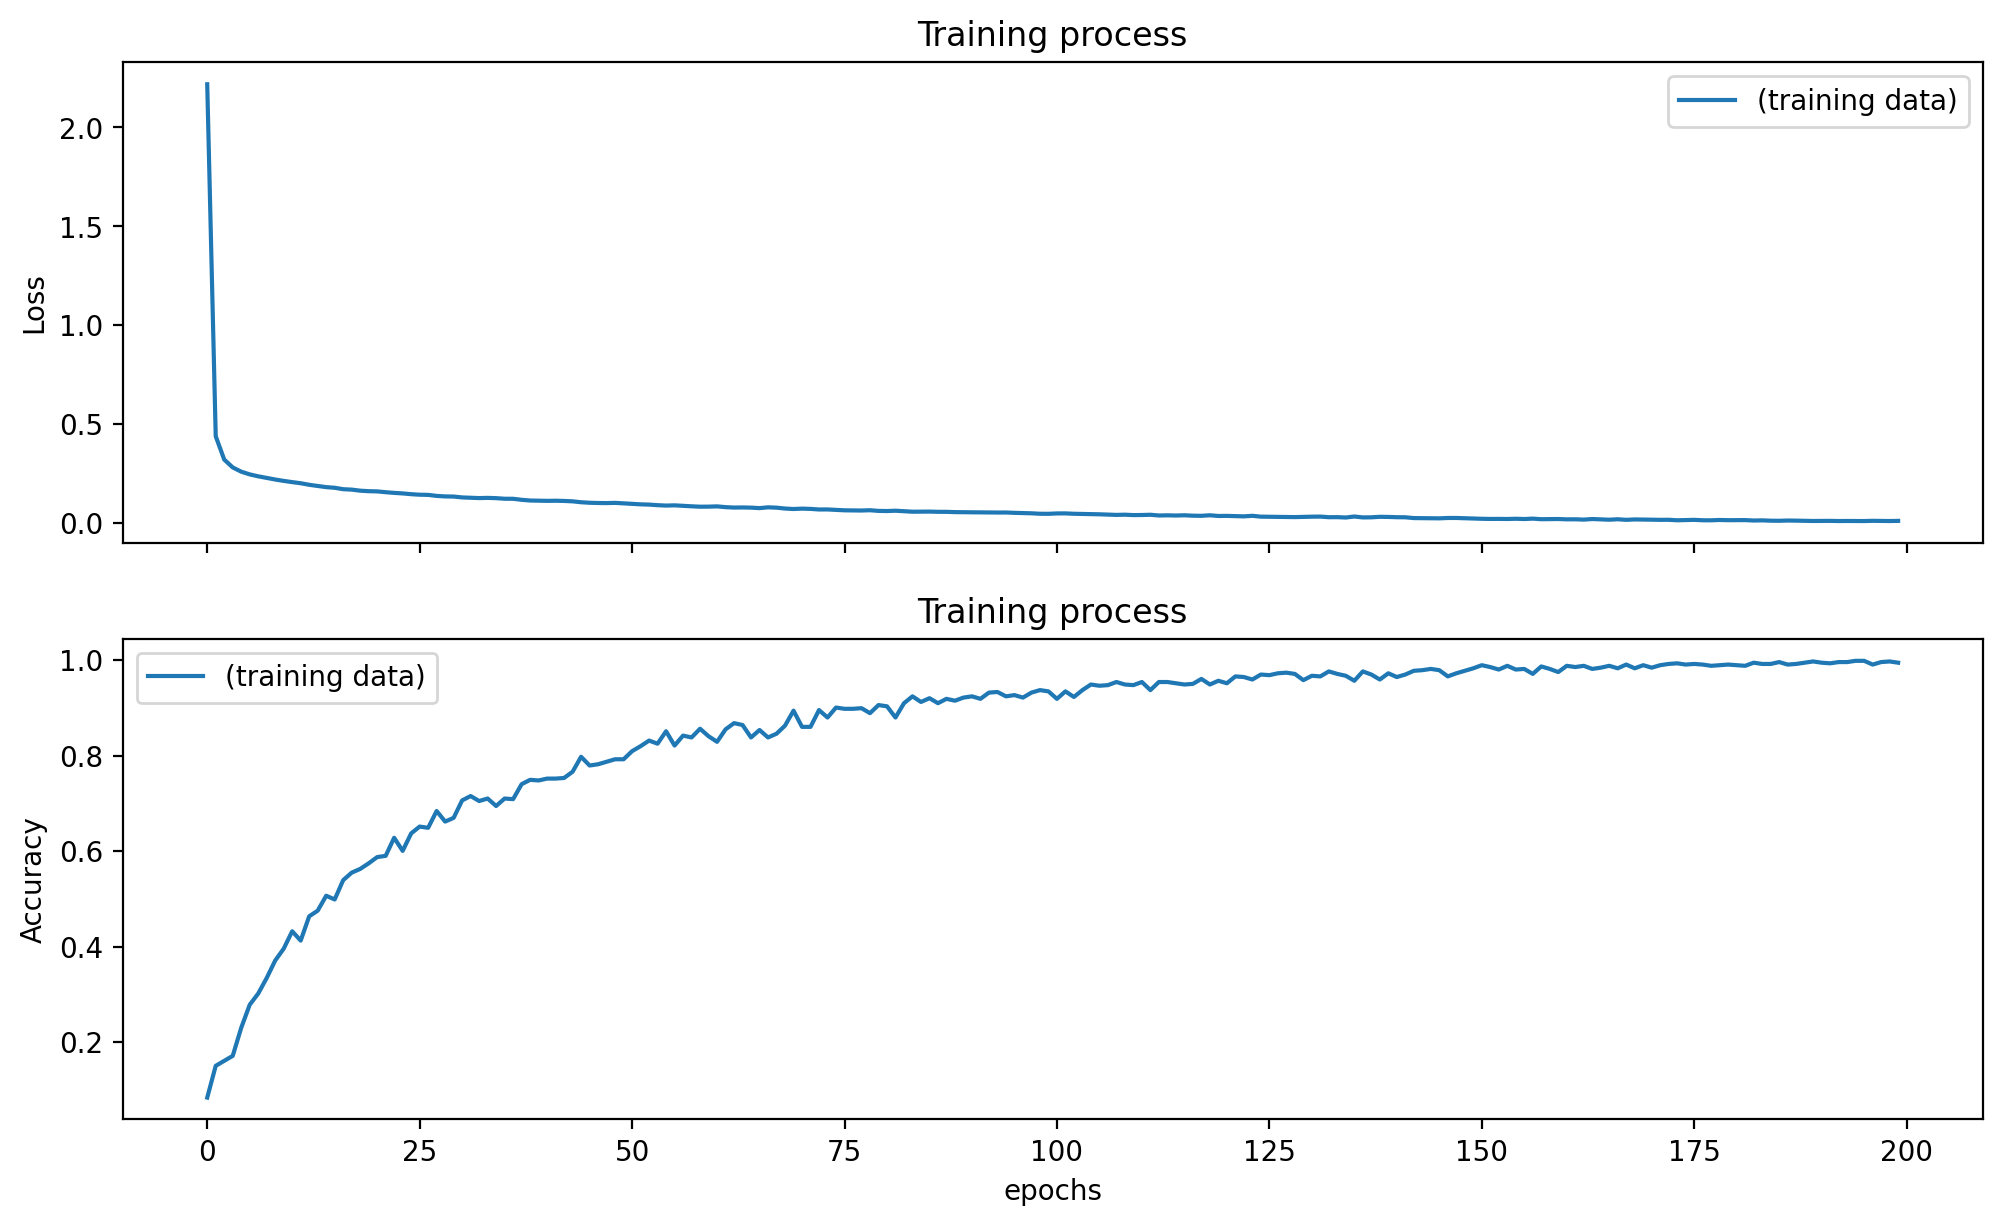

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['loss'], "-", label='(training data)')
ax1.set_title('Training process')
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(history.history['accuracy'], "-", label='(training data)')
ax2.set_title('Training process')
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("epochs")
ax2.legend()

# Evaluate the model on the test set

In [33]:
y_predicted.shape, y_test.shape

NameError: name 'y_predicted' is not defined

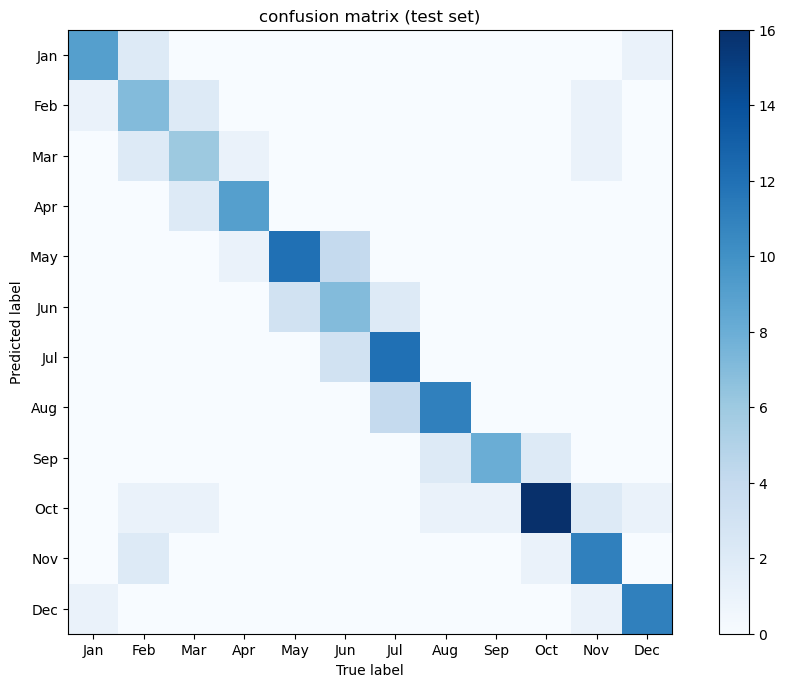

In [39]:
from sklearn.metrics import confusion_matrix
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

y_predicted = model.predict(X_test)
matrix = confusion_matrix(y_test.values.argmax(axis=1), y_predicted.argmax(axis=1))

plt.figure(figsize=(12, 8), dpi=100)
plt.imshow(matrix, cmap="Blues")
plt.title("confusion matrix (test set)")
plt.colorbar()
plt.xticks(np.arange(0,12), labels)
plt.yticks(np.arange(0,12), labels)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()
#plt.savefig("confusion_matrix_1_testset.png", dpi=200)

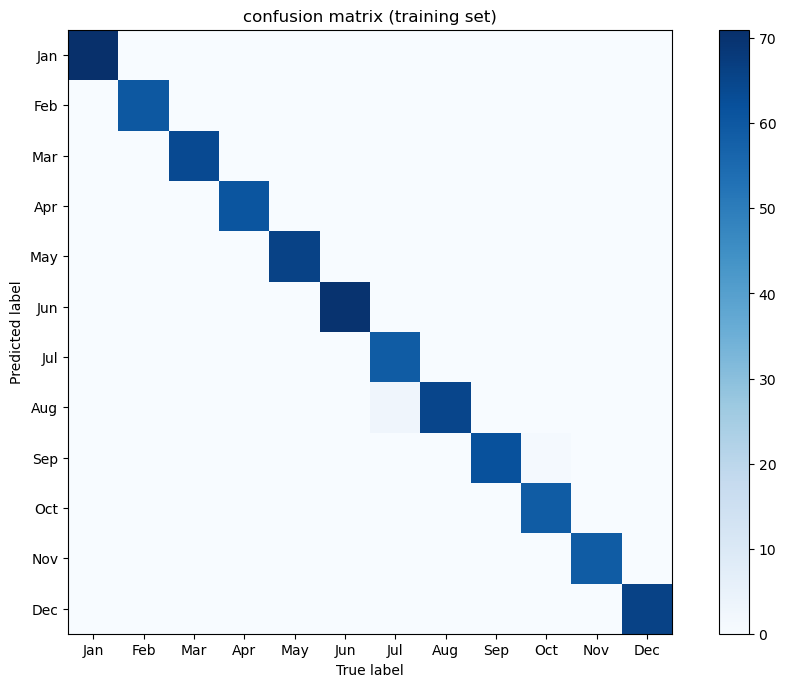

In [41]:
y_predicted = model.predict(X_train)
matrix = confusion_matrix(y_train.values.argmax(axis=1), y_predicted.argmax(axis=1))

plt.figure(figsize=(12, 8), dpi=100)
plt.imshow(matrix, cmap="Blues")
plt.title("confusion matrix (training set)")
plt.colorbar()
plt.xticks(np.arange(0,12), labels)
plt.yticks(np.arange(0,12), labels)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Use the validation set to monitor the training process

In [100]:
n_features = X_data.shape[1]
n_classes = 12  # all 12 months

# Input layer
layers_input = Input(shape=(n_features,), name='input')

# Dense layers
layers_dense = Dense(100, 'relu')(layers_input)
layers_dense = Dense(50, 'relu')(layers_dense)

# Output layer
layers_output = Dense(n_classes, 'sigmoid')(layers_dense)

# Defining the model and compiling it
model = Model(inputs=layers_input, outputs=layers_output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 154)]             0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               15500     
_________________________________________________________________
dense_30 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_31 (Dense)             (None, 12)                612       
Total params: 21,162
Trainable params: 21,162
Non-trainable params: 0
_________________________________________________________________


In [101]:
history = model.fit(X_train, Y_train,
                    batch_size = 50,
                    epochs = 200,
                    validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/200
16/16 - 1s - loss: 0.5334 - accuracy: 0.1240 - val_loss: 0.3466 - val_accuracy: 0.2134
Epoch 2/200
16/16 - 0s - loss: 0.3170 - accuracy: 0.1815 - val_loss: 0.2602 - val_accuracy: 0.2927
Epoch 3/200
16/16 - 0s - loss: 0.2514 - accuracy: 0.2898 - val_loss: 0.2274 - val_accuracy: 0.3537
Epoch 4/200
16/16 - 0s - loss: 0.2221 - accuracy: 0.3655 - val_loss: 0.2142 - val_accuracy: 0.4329
Epoch 5/200
16/16 - 0s - loss: 0.2098 - accuracy: 0.4243 - val_loss: 0.2026 - val_accuracy: 0.4695
Epoch 6/200
16/16 - 0s - loss: 0.1981 - accuracy: 0.4413 - val_loss: 0.1955 - val_accuracy: 0.4756
Epoch 7/200
16/16 - 0s - loss: 0.1874 - accuracy: 0.4608 - val_loss: 0.1886 - val_accuracy: 0.4878
Epoch 8/200
16/16 - 0s - loss: 0.1793 - accuracy: 0.5026 - val_loss: 0.1812 - val_accuracy: 0.4878
Epoch 9/200
16/16 - 0s - loss: 0.1693 - accuracy: 0.5379 - val_loss: 0.1767 - val_accuracy: 0.5122
Epoch 10/200
16/16 - 0s - loss: 0.1633 - accuracy: 0.5587 - val_loss: 0.1770 - val_accuracy: 0.5244
Epoch 11/

16/16 - 0s - loss: 0.0292 - accuracy: 0.9608 - val_loss: 0.1555 - val_accuracy: 0.6585
Epoch 84/200
16/16 - 0s - loss: 0.0286 - accuracy: 0.9556 - val_loss: 0.1484 - val_accuracy: 0.6341
Epoch 85/200
16/16 - 0s - loss: 0.0270 - accuracy: 0.9674 - val_loss: 0.1647 - val_accuracy: 0.6585
Epoch 86/200
16/16 - 0s - loss: 0.0284 - accuracy: 0.9621 - val_loss: 0.1444 - val_accuracy: 0.6890
Epoch 87/200
16/16 - 0s - loss: 0.0241 - accuracy: 0.9674 - val_loss: 0.1478 - val_accuracy: 0.6829
Epoch 88/200
16/16 - 0s - loss: 0.0227 - accuracy: 0.9778 - val_loss: 0.1499 - val_accuracy: 0.6707
Epoch 89/200
16/16 - 0s - loss: 0.0229 - accuracy: 0.9752 - val_loss: 0.1580 - val_accuracy: 0.6524
Epoch 90/200
16/16 - 0s - loss: 0.0223 - accuracy: 0.9791 - val_loss: 0.1514 - val_accuracy: 0.6646
Epoch 91/200
16/16 - 0s - loss: 0.0217 - accuracy: 0.9765 - val_loss: 0.1515 - val_accuracy: 0.7012
Epoch 92/200
16/16 - 0s - loss: 0.0248 - accuracy: 0.9661 - val_loss: 0.1504 - val_accuracy: 0.6890
Epoch 93/200


Epoch 165/200
16/16 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1758 - val_accuracy: 0.7317
Epoch 166/200
16/16 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1777 - val_accuracy: 0.7012
Epoch 167/200
16/16 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1877 - val_accuracy: 0.6829
Epoch 168/200
16/16 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1875 - val_accuracy: 0.7073
Epoch 169/200
16/16 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1851 - val_accuracy: 0.7012
Epoch 170/200
16/16 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1796 - val_accuracy: 0.6890
Epoch 171/200
16/16 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1832 - val_accuracy: 0.7012
Epoch 172/200
16/16 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1774 - val_accuracy: 0.6951
Epoch 173/200
16/16 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1921 - val_accuracy: 0.7012
Epoch 174/200
16/16 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1849 - val_accurac

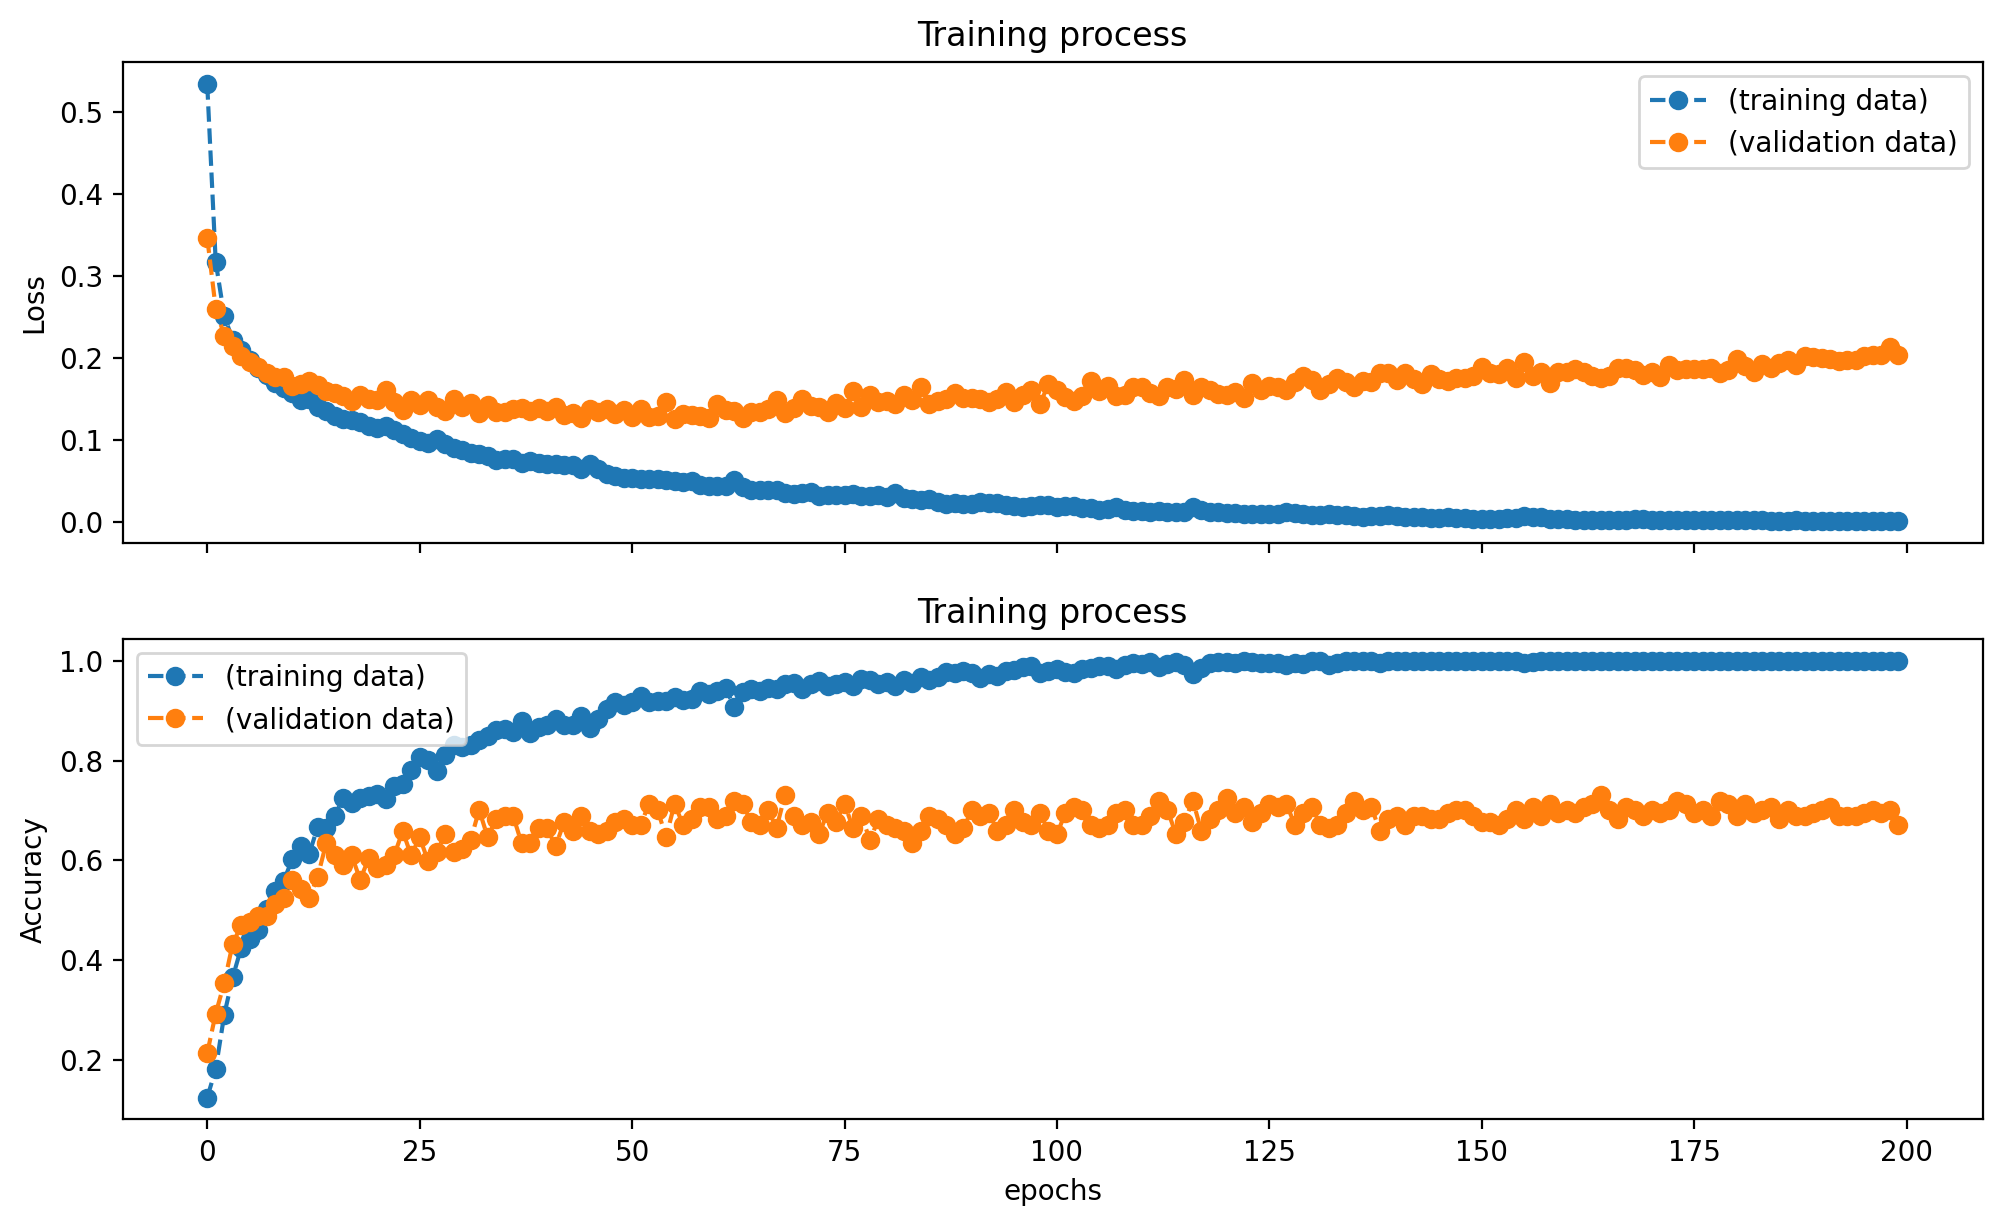

In [102]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['loss'], "o--", label='(training data)')
ax1.plot(history.history['val_loss'], "o--", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(history.history['accuracy'], "o--", label='(training data)')
ax2.plot(history.history['val_accuracy'], "o--", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("epochs")
ax2.legend()

# Add unbalanced aspect

# Split data into data (X) and labels (y)

In [106]:
idx.shape

(331,)

In [143]:
datapoints_to_remove = data.loc[:365*3][data.loc[:365*3]["MONTH"] < 3].index[60:]
datapoints_to_remove.shape

(118,)

In [145]:
#idx = np.where((data.loc[:365*3]["MONTH"] > 1) | (data.loc[:365*3]["BASEL_humidity"] > 0.86))[0]
idx = [i for i in np.arange(0, 3*366) if i not in datapoints_to_remove]
X_data = data.iloc[idx, 2:]  # alternative: data.drop(columns=["DATE", "MONTH"])
print(X_data.shape)
X_data.head()

(980, 154)


,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,3,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,6,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,8,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,5,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [146]:
y_data = data["MONTH"][idx]

In [147]:
y_data_onehot = pd.get_dummies(y_data)
y_data_onehot.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.033673,0.029592,0.094898,0.091837,0.094898,0.091837,0.094898,0.094898,0.091837,0.094898,0.091837,0.094898
std,0.180479,0.169545,0.293224,0.288943,0.293224,0.288943,0.293224,0.293224,0.288943,0.293224,0.288943,0.293224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Split data into training, validation, and test set

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_data_onehot, test_size=0.3, random_state=0) 
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=0)

print(f"Data split into training ({X_train.shape[0]})," \
      f" validation ({X_val.shape[0]}) and test set ({X_test.shape[0]}).") 

Data split into training (686), validation (147) and test set (147).


In [149]:
# this also shuffled the data!
Y_train.values[:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

# Build neural network

In [150]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [151]:
X_train.shape, Y_train.shape

((686, 154), (686, 12))

In [152]:
n_features = X_data.shape[1]
n_classes = 12  # all 12 months

# Input layer
layers_input = Input(shape=(n_features,), name='input')

# Dense layers
layers_dense = Dense(50, 'relu')(layers_input)
layers_dense = Dense(50, 'relu')(layers_dense)

# Output layer
layers_output = Dense(n_classes, 'sigmoid')(layers_dense)

# Defining the model and compiling it
model = Model(inputs=layers_input, outputs=layers_output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 154)]             0         
_________________________________________________________________
dense_41 (Dense)             (None, 50)                7750      
_________________________________________________________________
dense_42 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_43 (Dense)             (None, 12)                612       
Total params: 10,912
Trainable params: 10,912
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(X_train, Y_train,
                    batch_size = 50,
                    epochs = 200,
                    verbose = 2)

Epoch 1/200
52/52 - 1s - loss: 0.3579 - accuracy: 0.1713
Epoch 2/200
52/52 - 0s - loss: 0.2295 - accuracy: 0.3062
Epoch 3/200
52/52 - 0s - loss: 0.2075 - accuracy: 0.3872
Epoch 4/200
52/52 - 0s - loss: 0.1924 - accuracy: 0.4400
Epoch 5/200
52/52 - 0s - loss: 0.1815 - accuracy: 0.4736
Epoch 6/200
52/52 - 0s - loss: 0.1727 - accuracy: 0.5061
Epoch 7/200
52/52 - 0s - loss: 0.1620 - accuracy: 0.5471
Epoch 8/200
52/52 - 0s - loss: 0.1562 - accuracy: 0.5624
Epoch 9/200
52/52 - 0s - loss: 0.1498 - accuracy: 0.5870
Epoch 10/200
52/52 - 0s - loss: 0.1440 - accuracy: 0.6156
Epoch 11/200
52/52 - 0s - loss: 0.1369 - accuracy: 0.6390
Epoch 12/200
52/52 - 0s - loss: 0.1326 - accuracy: 0.6578
Epoch 13/200
52/52 - 0s - loss: 0.1314 - accuracy: 0.6574
Epoch 14/200
52/52 - 0s - loss: 0.1265 - accuracy: 0.6738
Epoch 15/200
52/52 - 0s - loss: 0.1216 - accuracy: 0.6899
Epoch 16/200
52/52 - 0s - loss: 0.1165 - accuracy: 0.7137
Epoch 17/200
52/52 - 0s - loss: 0.1142 - accuracy: 0.7219
Epoch 18/200
52/52 - 0s

Epoch 142/200
52/52 - 0s - loss: 0.0184 - accuracy: 0.9699
Epoch 143/200
52/52 - 0s - loss: 0.0227 - accuracy: 0.9542
Epoch 144/200
52/52 - 0s - loss: 0.0165 - accuracy: 0.9718
Epoch 145/200
52/52 - 0s - loss: 0.0132 - accuracy: 0.9793
Epoch 146/200
52/52 - 0s - loss: 0.0163 - accuracy: 0.9718
Epoch 147/200
52/52 - 0s - loss: 0.0130 - accuracy: 0.9808
Epoch 148/200
52/52 - 0s - loss: 0.0155 - accuracy: 0.9711
Epoch 149/200
52/52 - 0s - loss: 0.0151 - accuracy: 0.9758
Epoch 150/200
52/52 - 0s - loss: 0.0122 - accuracy: 0.9836
Epoch 151/200
52/52 - 0s - loss: 0.0110 - accuracy: 0.9847
Epoch 152/200
52/52 - 0s - loss: 0.0114 - accuracy: 0.9851
Epoch 153/200
52/52 - 0s - loss: 0.0127 - accuracy: 0.9793
Epoch 154/200
52/52 - 0s - loss: 0.0234 - accuracy: 0.9550
Epoch 155/200
52/52 - 0s - loss: 0.0123 - accuracy: 0.9820
Epoch 156/200
52/52 - 0s - loss: 0.0126 - accuracy: 0.9808
Epoch 157/200
52/52 - 0s - loss: 0.0147 - accuracy: 0.9765
Epoch 158/200
52/52 - 0s - loss: 0.0109 - accuracy: 0.98

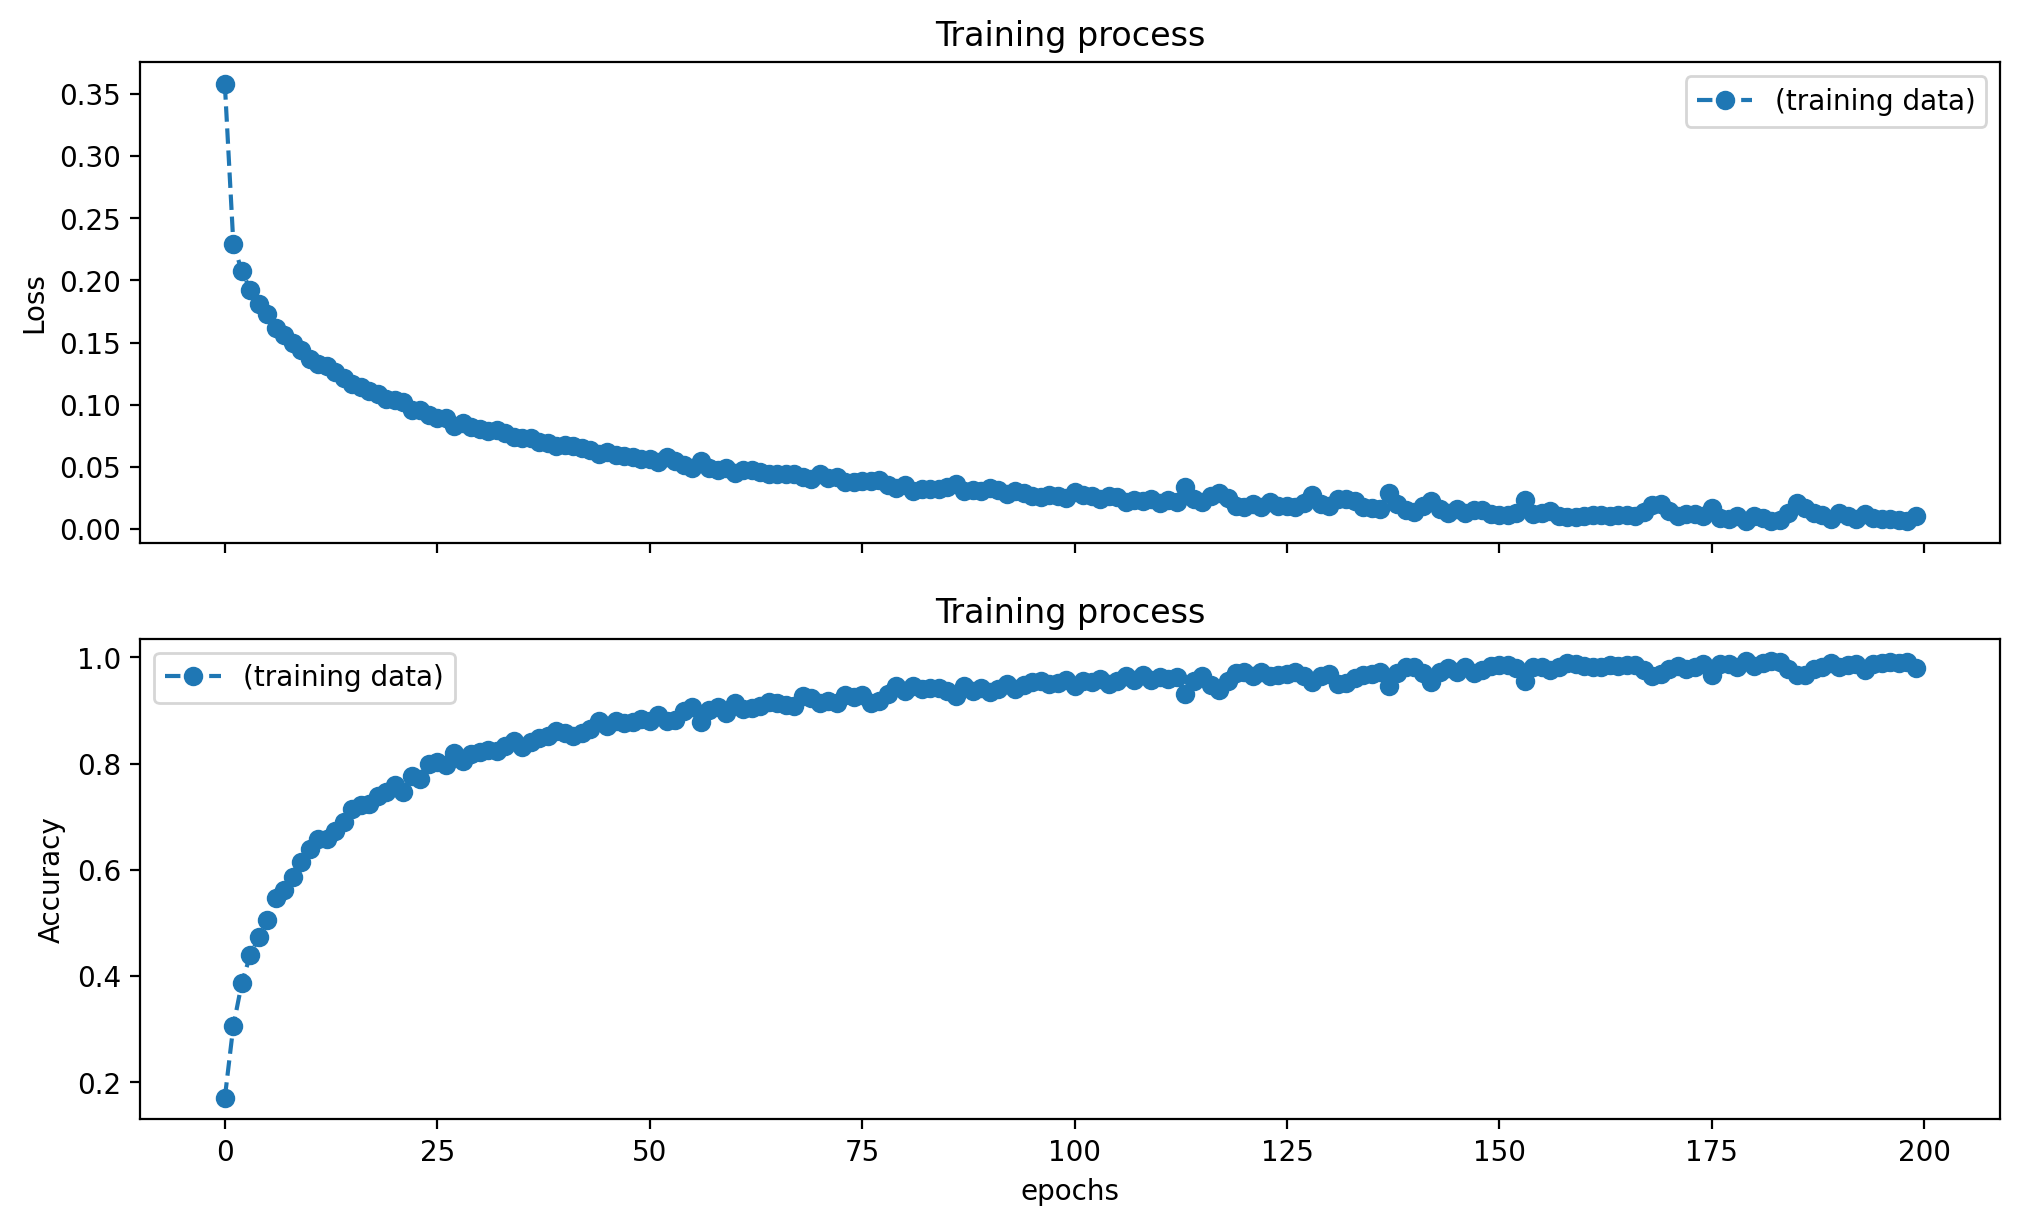

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['loss'], "o--", label='(training data)')
ax1.set_title('Training process')
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(history.history['accuracy'], "o--", label='(training data)')
ax2.set_title('Training process')
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("epochs")
ax2.legend()

# Evaluate the model on the test set

In [50]:
y_predicted.shape, Y_test.shape

((549, 12), (549, 12))

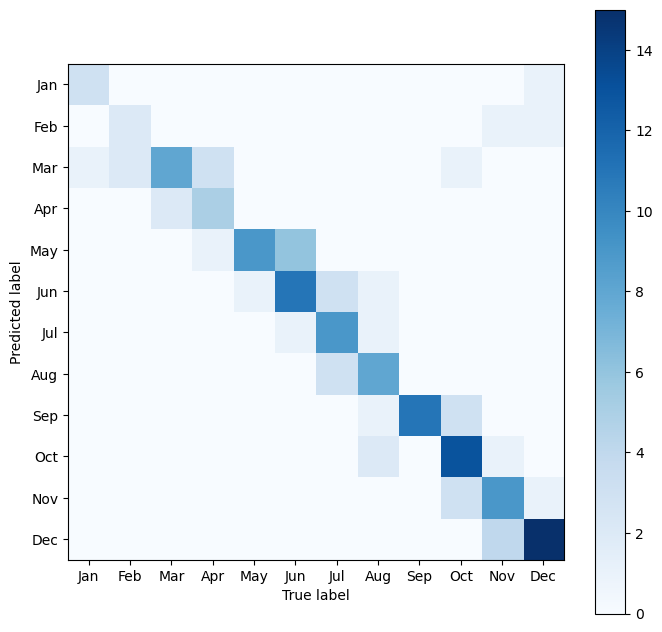

In [158]:
from sklearn.metrics import confusion_matrix
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

y_predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test.values.argmax(axis=1), y_predicted.argmax(axis=1))

plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(matrix, cmap="Blues")
plt.colorbar()
plt.xticks(np.arange(0,12), labels)
plt.yticks(np.arange(0,12), labels)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

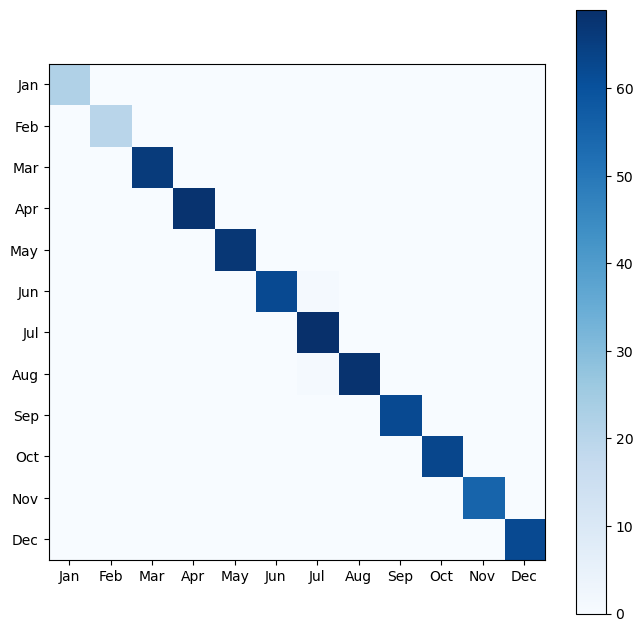

In [156]:
y_predicted = model.predict(X_train)
matrix = confusion_matrix(Y_train.values.argmax(axis=1), y_predicted.argmax(axis=1))

plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(matrix, cmap="Blues")
plt.colorbar()
plt.xticks(np.arange(0,12), labels)
plt.yticks(np.arange(0,12), labels)
plt.show()

# Use the validation set to monitor the training process

In [153]:
n_features = X_data.shape[1]
n_classes = 12  # all 12 months

# Input layer
layers_input = Input(shape=(n_features,), name='input')

# Dense layers
layers_dense = Dense(50, 'relu')(layers_input)
layers_dense = Dense(50, 'relu')(layers_dense)

# Output layer
layers_output = Dense(n_classes, 'sigmoid')(layers_dense)

# Defining the model and compiling it
model = Model(inputs=layers_input, outputs=layers_output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 154)]             0         
_________________________________________________________________
dense_44 (Dense)             (None, 50)                7750      
_________________________________________________________________
dense_45 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_46 (Dense)             (None, 12)                612       
Total params: 10,912
Trainable params: 10,912
Non-trainable params: 0
_________________________________________________________________


In [154]:
history = model.fit(X_train, Y_train,
                    batch_size = 50,
                    epochs = 200,
                    validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/200
14/14 - 1s - loss: 1.1542 - accuracy: 0.1195 - val_loss: 0.3983 - val_accuracy: 0.1837
Epoch 2/200
14/14 - 0s - loss: 0.3554 - accuracy: 0.2128 - val_loss: 0.2985 - val_accuracy: 0.1497
Epoch 3/200
14/14 - 0s - loss: 0.2839 - accuracy: 0.2172 - val_loss: 0.2624 - val_accuracy: 0.2381
Epoch 4/200
14/14 - 0s - loss: 0.2534 - accuracy: 0.2857 - val_loss: 0.2459 - val_accuracy: 0.2993
Epoch 5/200
14/14 - 0s - loss: 0.2359 - accuracy: 0.3367 - val_loss: 0.2293 - val_accuracy: 0.3333
Epoch 6/200
14/14 - 0s - loss: 0.2221 - accuracy: 0.3630 - val_loss: 0.2182 - val_accuracy: 0.4218
Epoch 7/200
14/14 - 0s - loss: 0.2099 - accuracy: 0.4082 - val_loss: 0.2077 - val_accuracy: 0.4082
Epoch 8/200
14/14 - 0s - loss: 0.1980 - accuracy: 0.4402 - val_loss: 0.1991 - val_accuracy: 0.4762
Epoch 9/200
14/14 - 0s - loss: 0.1881 - accuracy: 0.4708 - val_loss: 0.1938 - val_accuracy: 0.4830
Epoch 10/200
14/14 - 0s - loss: 0.1806 - accuracy: 0.5073 - val_loss: 0.1933 - val_accuracy: 0.4558
Epoch 11/

14/14 - 0s - loss: 0.0509 - accuracy: 0.9169 - val_loss: 0.1185 - val_accuracy: 0.7415
Epoch 84/200
14/14 - 0s - loss: 0.0500 - accuracy: 0.9155 - val_loss: 0.1169 - val_accuracy: 0.7143
Epoch 85/200
14/14 - 0s - loss: 0.0478 - accuracy: 0.9417 - val_loss: 0.1149 - val_accuracy: 0.7551
Epoch 86/200
14/14 - 0s - loss: 0.0487 - accuracy: 0.9169 - val_loss: 0.1155 - val_accuracy: 0.7551
Epoch 87/200
14/14 - 0s - loss: 0.0480 - accuracy: 0.9286 - val_loss: 0.1124 - val_accuracy: 0.7619
Epoch 88/200
14/14 - 0s - loss: 0.0472 - accuracy: 0.9329 - val_loss: 0.1201 - val_accuracy: 0.7347
Epoch 89/200
14/14 - 0s - loss: 0.0469 - accuracy: 0.9329 - val_loss: 0.1125 - val_accuracy: 0.7483
Epoch 90/200
14/14 - 0s - loss: 0.0466 - accuracy: 0.9300 - val_loss: 0.1145 - val_accuracy: 0.7619
Epoch 91/200
14/14 - 0s - loss: 0.0459 - accuracy: 0.9271 - val_loss: 0.1159 - val_accuracy: 0.7483
Epoch 92/200
14/14 - 0s - loss: 0.0437 - accuracy: 0.9475 - val_loss: 0.1178 - val_accuracy: 0.7483
Epoch 93/200


Epoch 165/200
14/14 - 0s - loss: 0.0146 - accuracy: 0.9913 - val_loss: 0.1447 - val_accuracy: 0.7551
Epoch 166/200
14/14 - 0s - loss: 0.0146 - accuracy: 0.9869 - val_loss: 0.1474 - val_accuracy: 0.7755
Epoch 167/200
14/14 - 0s - loss: 0.0153 - accuracy: 0.9898 - val_loss: 0.1403 - val_accuracy: 0.7483
Epoch 168/200
14/14 - 0s - loss: 0.0191 - accuracy: 0.9738 - val_loss: 0.1562 - val_accuracy: 0.7211
Epoch 169/200
14/14 - 0s - loss: 0.0153 - accuracy: 0.9883 - val_loss: 0.1456 - val_accuracy: 0.7143
Epoch 170/200
14/14 - 0s - loss: 0.0140 - accuracy: 0.9913 - val_loss: 0.1452 - val_accuracy: 0.7619
Epoch 171/200
14/14 - 0s - loss: 0.0136 - accuracy: 0.9913 - val_loss: 0.1547 - val_accuracy: 0.7347
Epoch 172/200
14/14 - 0s - loss: 0.0143 - accuracy: 0.9942 - val_loss: 0.1492 - val_accuracy: 0.7415
Epoch 173/200
14/14 - 0s - loss: 0.0147 - accuracy: 0.9840 - val_loss: 0.1478 - val_accuracy: 0.7619
Epoch 174/200
14/14 - 0s - loss: 0.0139 - accuracy: 0.9913 - val_loss: 0.1465 - val_accurac

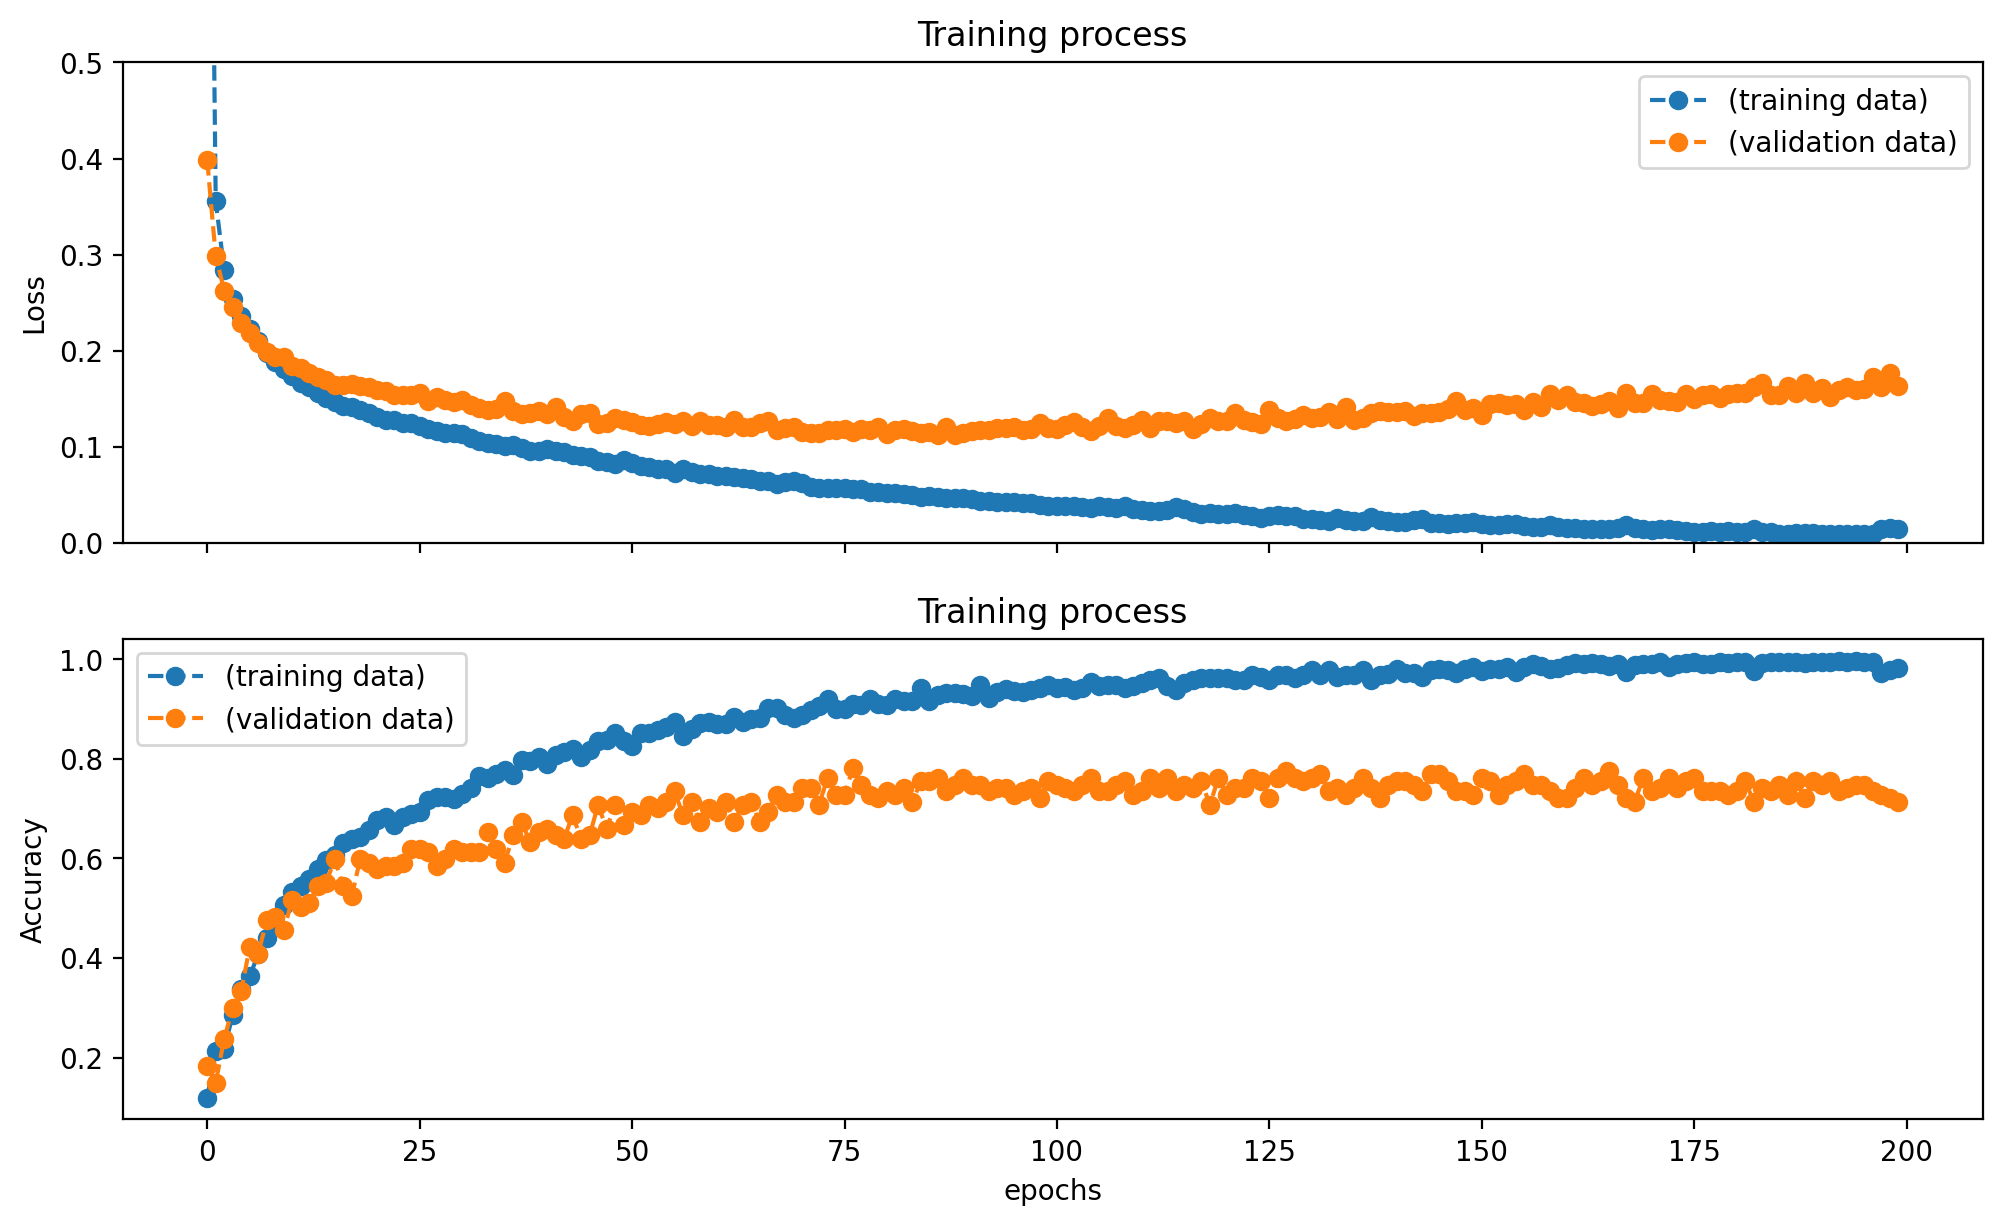

In [155]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['loss'], "o--", label='(training data)')
ax1.plot(history.history['val_loss'], "o--", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("Loss")
ax1.set_ylim((0, 0.5))
ax1.legend()

ax2.plot(history.history['accuracy'], "o--", label='(training data)')
ax2.plot(history.history['val_accuracy'], "o--", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("epochs")
ax2.legend()

# Measures against overfitting

In [160]:
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

n_features = X_data.shape[1]
n_classes = 12  # all 12 months

# Input layer
layers_input = Input(shape=(n_features,), name='input')

# Dense layers
layers = Dense(50, 'relu')(layers_input)
layers = Dropout(rate=0.25)(layers)
layers = Dense(50, 'relu')(layers)
layers = Dropout(rate=0.25)(layers)

# Output layer
layers_output = Dense(n_classes, 'sigmoid')(layers)

# Defining the model and compiling it
model = Model(inputs=layers_input, outputs=layers_output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 154)]             0         
_________________________________________________________________
dense_48 (Dense)             (None, 50)                7750      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 12)                612       
Total params: 10,912
Trainable params: 10,912
Non-trainable params: 0
______________________________________________________

In [161]:
history = model.fit(X_train, Y_train,
                    batch_size = 50,
                    epochs = 200,
                    validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/200
14/14 - 1s - loss: 1.2731 - accuracy: 0.1152 - val_loss: 0.4164 - val_accuracy: 0.2313
Epoch 2/200
14/14 - 0s - loss: 0.5480 - accuracy: 0.1356 - val_loss: 0.2911 - val_accuracy: 0.2109
Epoch 3/200
14/14 - 0s - loss: 0.4064 - accuracy: 0.1195 - val_loss: 0.2895 - val_accuracy: 0.1293
Epoch 4/200
14/14 - 0s - loss: 0.3709 - accuracy: 0.1327 - val_loss: 0.2757 - val_accuracy: 0.1973
Epoch 5/200
14/14 - 0s - loss: 0.3589 - accuracy: 0.1501 - val_loss: 0.2700 - val_accuracy: 0.2517
Epoch 6/200
14/14 - 0s - loss: 0.3491 - accuracy: 0.1224 - val_loss: 0.2647 - val_accuracy: 0.2721
Epoch 7/200
14/14 - 0s - loss: 0.3370 - accuracy: 0.1793 - val_loss: 0.2553 - val_accuracy: 0.3469
Epoch 8/200
14/14 - 0s - loss: 0.3248 - accuracy: 0.1793 - val_loss: 0.2480 - val_accuracy: 0.3469
Epoch 9/200
14/14 - 0s - loss: 0.3127 - accuracy: 0.2216 - val_loss: 0.2453 - val_accuracy: 0.3673
Epoch 10/200
14/14 - 0s - loss: 0.3034 - accuracy: 0.2216 - val_loss: 0.2380 - val_accuracy: 0.3741
Epoch 11/

14/14 - 0s - loss: 0.1317 - accuracy: 0.6793 - val_loss: 0.1400 - val_accuracy: 0.6463
Epoch 84/200
14/14 - 0s - loss: 0.1376 - accuracy: 0.6152 - val_loss: 0.1301 - val_accuracy: 0.6939
Epoch 85/200
14/14 - 0s - loss: 0.1291 - accuracy: 0.6531 - val_loss: 0.1326 - val_accuracy: 0.6803
Epoch 86/200
14/14 - 0s - loss: 0.1292 - accuracy: 0.6633 - val_loss: 0.1310 - val_accuracy: 0.6531
Epoch 87/200
14/14 - 0s - loss: 0.1336 - accuracy: 0.6297 - val_loss: 0.1323 - val_accuracy: 0.6871
Epoch 88/200
14/14 - 0s - loss: 0.1269 - accuracy: 0.6560 - val_loss: 0.1326 - val_accuracy: 0.6327
Epoch 89/200
14/14 - 0s - loss: 0.1294 - accuracy: 0.6647 - val_loss: 0.1321 - val_accuracy: 0.6531
Epoch 90/200
14/14 - 0s - loss: 0.1296 - accuracy: 0.6545 - val_loss: 0.1301 - val_accuracy: 0.6803
Epoch 91/200
14/14 - 0s - loss: 0.1343 - accuracy: 0.6516 - val_loss: 0.1332 - val_accuracy: 0.6939
Epoch 92/200
14/14 - 0s - loss: 0.1282 - accuracy: 0.6429 - val_loss: 0.1257 - val_accuracy: 0.7007
Epoch 93/200


Epoch 165/200
14/14 - 0s - loss: 0.0857 - accuracy: 0.7988 - val_loss: 0.1108 - val_accuracy: 0.7619
Epoch 166/200
14/14 - 0s - loss: 0.0891 - accuracy: 0.7697 - val_loss: 0.1138 - val_accuracy: 0.7279
Epoch 167/200
14/14 - 0s - loss: 0.0834 - accuracy: 0.8061 - val_loss: 0.1124 - val_accuracy: 0.7551
Epoch 168/200
14/14 - 0s - loss: 0.0834 - accuracy: 0.8003 - val_loss: 0.1106 - val_accuracy: 0.7279
Epoch 169/200
14/14 - 0s - loss: 0.0910 - accuracy: 0.7915 - val_loss: 0.1133 - val_accuracy: 0.7687
Epoch 170/200
14/14 - 0s - loss: 0.0891 - accuracy: 0.7682 - val_loss: 0.1168 - val_accuracy: 0.7347
Epoch 171/200
14/14 - 0s - loss: 0.0892 - accuracy: 0.7857 - val_loss: 0.1119 - val_accuracy: 0.7415
Epoch 172/200
14/14 - 0s - loss: 0.0848 - accuracy: 0.8105 - val_loss: 0.1168 - val_accuracy: 0.7415
Epoch 173/200
14/14 - 0s - loss: 0.0844 - accuracy: 0.8017 - val_loss: 0.1128 - val_accuracy: 0.7347
Epoch 174/200
14/14 - 0s - loss: 0.0849 - accuracy: 0.7945 - val_loss: 0.1160 - val_accurac

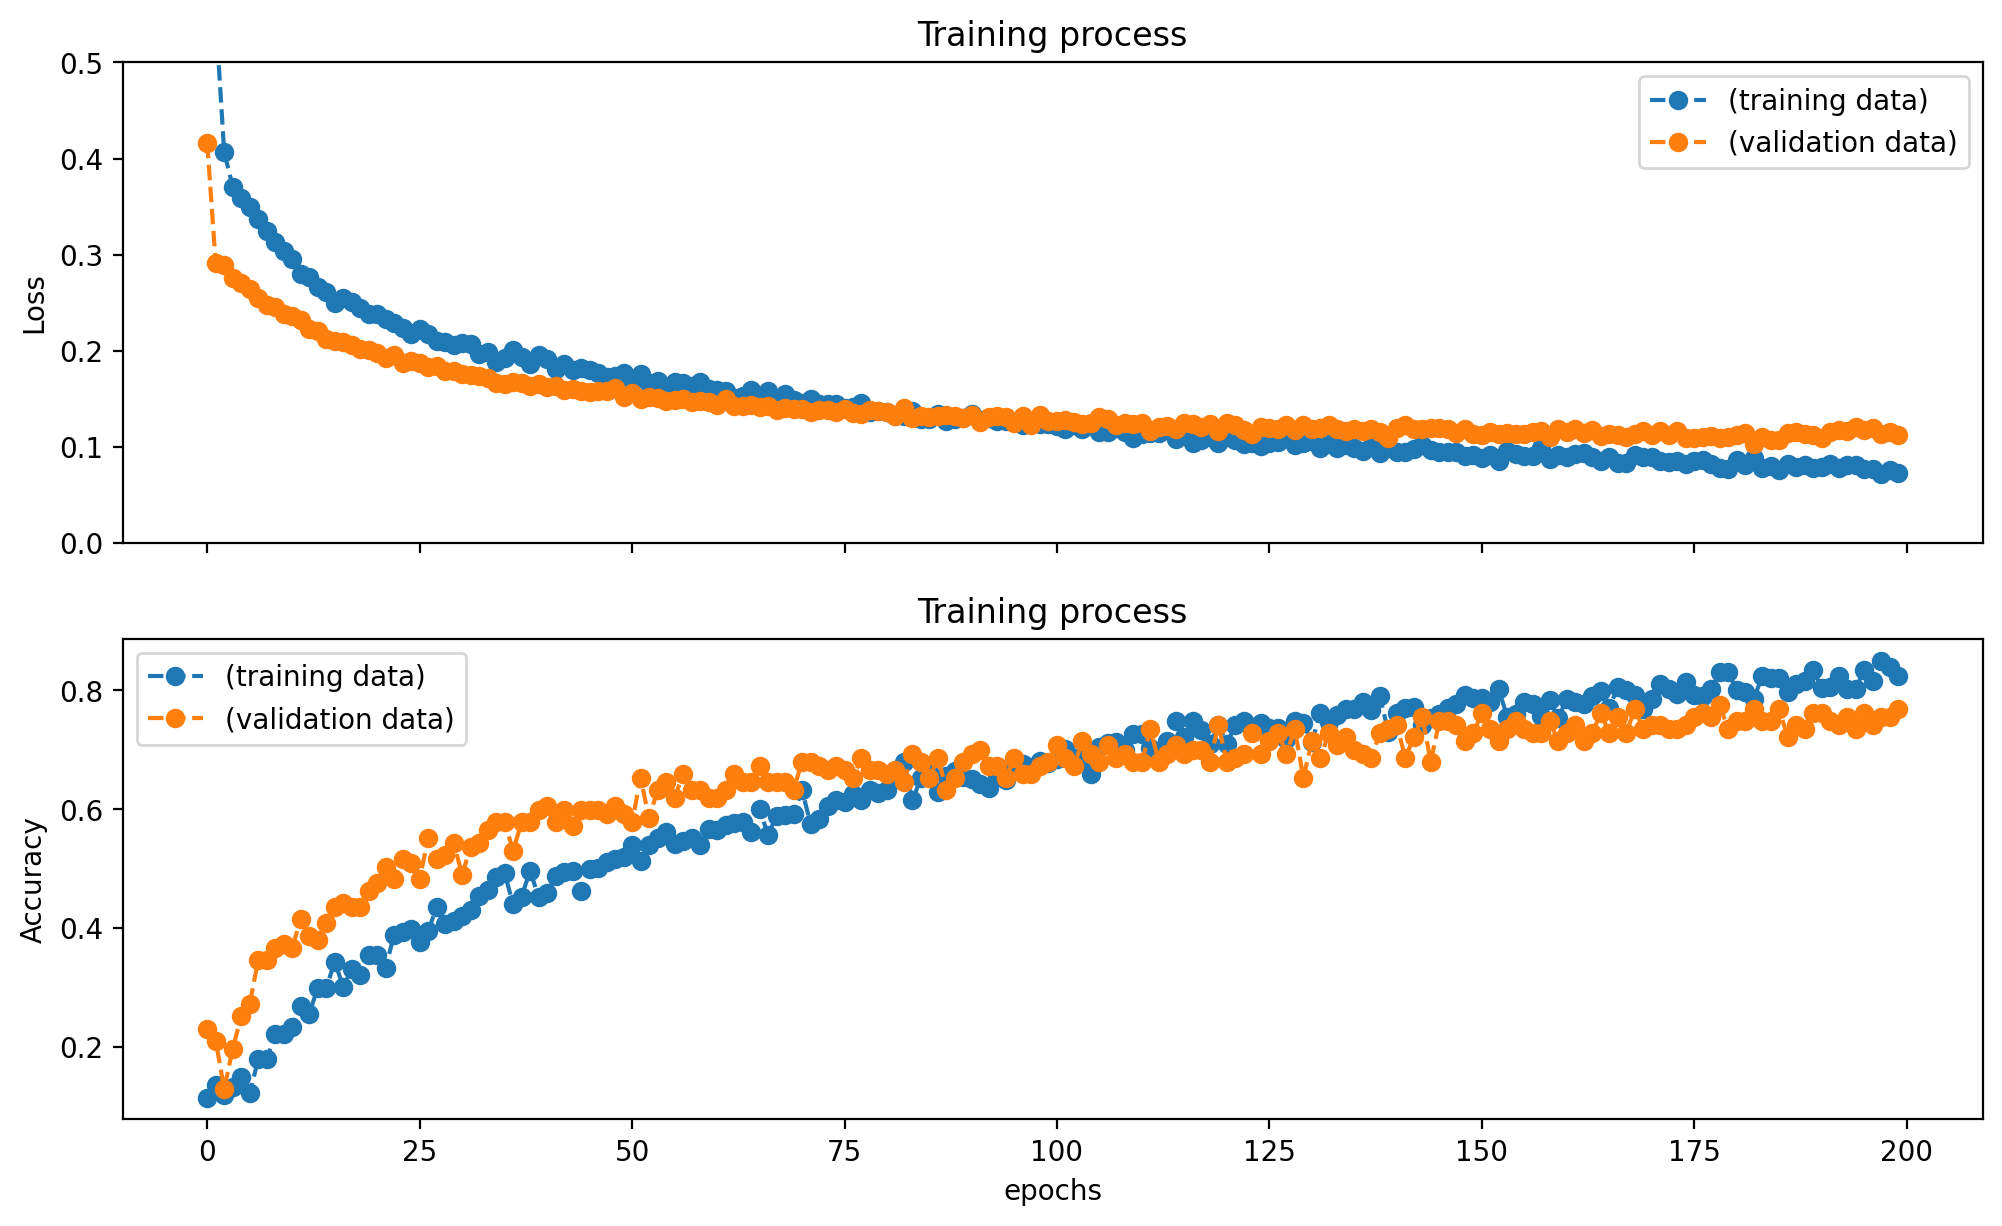

In [162]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['loss'], "o--", label='(training data)')
ax1.plot(history.history['val_loss'], "o--", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("Loss")
ax1.set_ylim((0, 0.5))
ax1.legend()

ax2.plot(history.history['accuracy'], "o--", label='(training data)')
ax2.plot(history.history['val_accuracy'], "o--", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("epochs")
ax2.legend()

# Apply early stopping

In [164]:
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

def classifier_nn(n_features, n_classes):
    # Input layer
    layers_input = Input(shape=(n_features,), name='input')

    # Dense layers
    layers = Dense(50, 'relu')(layers_input)
    layers = Dropout(rate=0.25)(layers)
    layers = Dense(50, 'relu')(layers)
    layers = Dropout(rate=0.25)(layers)

    # Output layer
    layers_output = Dense(n_classes, 'sigmoid')(layers)

    # Defining the model and compiling it
    return Model(inputs=layers_input, outputs=layers_output)

n_features = X_data.shape[1]
n_classes = 12  # all 12 months
model = classifier_nn(n_features, n_classes)

In [166]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss', mode="min",
    patience=10,
    verbose=1
    )

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size = 50,
                    epochs = 200,
                    validation_data=(X_val, Y_val),
                    callbacks=[earlystopper],
                    verbose = 2)

Epoch 1/200
14/14 - 1s - loss: 1.4522 - accuracy: 0.0991 - val_loss: 0.4100 - val_accuracy: 0.1020
Epoch 2/200
14/14 - 0s - loss: 0.5865 - accuracy: 0.1108 - val_loss: 0.3143 - val_accuracy: 0.1224
Epoch 3/200
14/14 - 0s - loss: 0.4259 - accuracy: 0.1370 - val_loss: 0.2977 - val_accuracy: 0.1633
Epoch 4/200
14/14 - 0s - loss: 0.3713 - accuracy: 0.1181 - val_loss: 0.2895 - val_accuracy: 0.1361
Epoch 5/200
14/14 - 0s - loss: 0.3468 - accuracy: 0.1414 - val_loss: 0.2766 - val_accuracy: 0.1769
Epoch 6/200
14/14 - 0s - loss: 0.3258 - accuracy: 0.1720 - val_loss: 0.2727 - val_accuracy: 0.2177
Epoch 7/200
14/14 - 0s - loss: 0.3215 - accuracy: 0.1531 - val_loss: 0.2673 - val_accuracy: 0.2449
Epoch 8/200
14/14 - 0s - loss: 0.3060 - accuracy: 0.1851 - val_loss: 0.2621 - val_accuracy: 0.2857
Epoch 9/200
14/14 - 0s - loss: 0.3048 - accuracy: 0.2172 - val_loss: 0.2590 - val_accuracy: 0.2925
Epoch 10/200
14/14 - 0s - loss: 0.2914 - accuracy: 0.2391 - val_loss: 0.2486 - val_accuracy: 0.3673
Epoch 11/

14/14 - 0s - loss: 0.1373 - accuracy: 0.6210 - val_loss: 0.1311 - val_accuracy: 0.6259
Epoch 84/200
14/14 - 0s - loss: 0.1261 - accuracy: 0.7128 - val_loss: 0.1321 - val_accuracy: 0.6599
Epoch 85/200
14/14 - 0s - loss: 0.1276 - accuracy: 0.6676 - val_loss: 0.1317 - val_accuracy: 0.6395
Epoch 86/200
14/14 - 0s - loss: 0.1283 - accuracy: 0.6706 - val_loss: 0.1265 - val_accuracy: 0.6871
Epoch 87/200
14/14 - 0s - loss: 0.1274 - accuracy: 0.7012 - val_loss: 0.1294 - val_accuracy: 0.6667
Epoch 88/200
14/14 - 0s - loss: 0.1304 - accuracy: 0.6618 - val_loss: 0.1296 - val_accuracy: 0.6531
Epoch 89/200
14/14 - 0s - loss: 0.1235 - accuracy: 0.7012 - val_loss: 0.1360 - val_accuracy: 0.6667
Epoch 90/200
14/14 - 0s - loss: 0.1281 - accuracy: 0.6676 - val_loss: 0.1288 - val_accuracy: 0.6871
Epoch 91/200
14/14 - 0s - loss: 0.1248 - accuracy: 0.6837 - val_loss: 0.1313 - val_accuracy: 0.6939
Epoch 92/200
14/14 - 0s - loss: 0.1235 - accuracy: 0.6676 - val_loss: 0.1311 - val_accuracy: 0.6735
Epoch 93/200


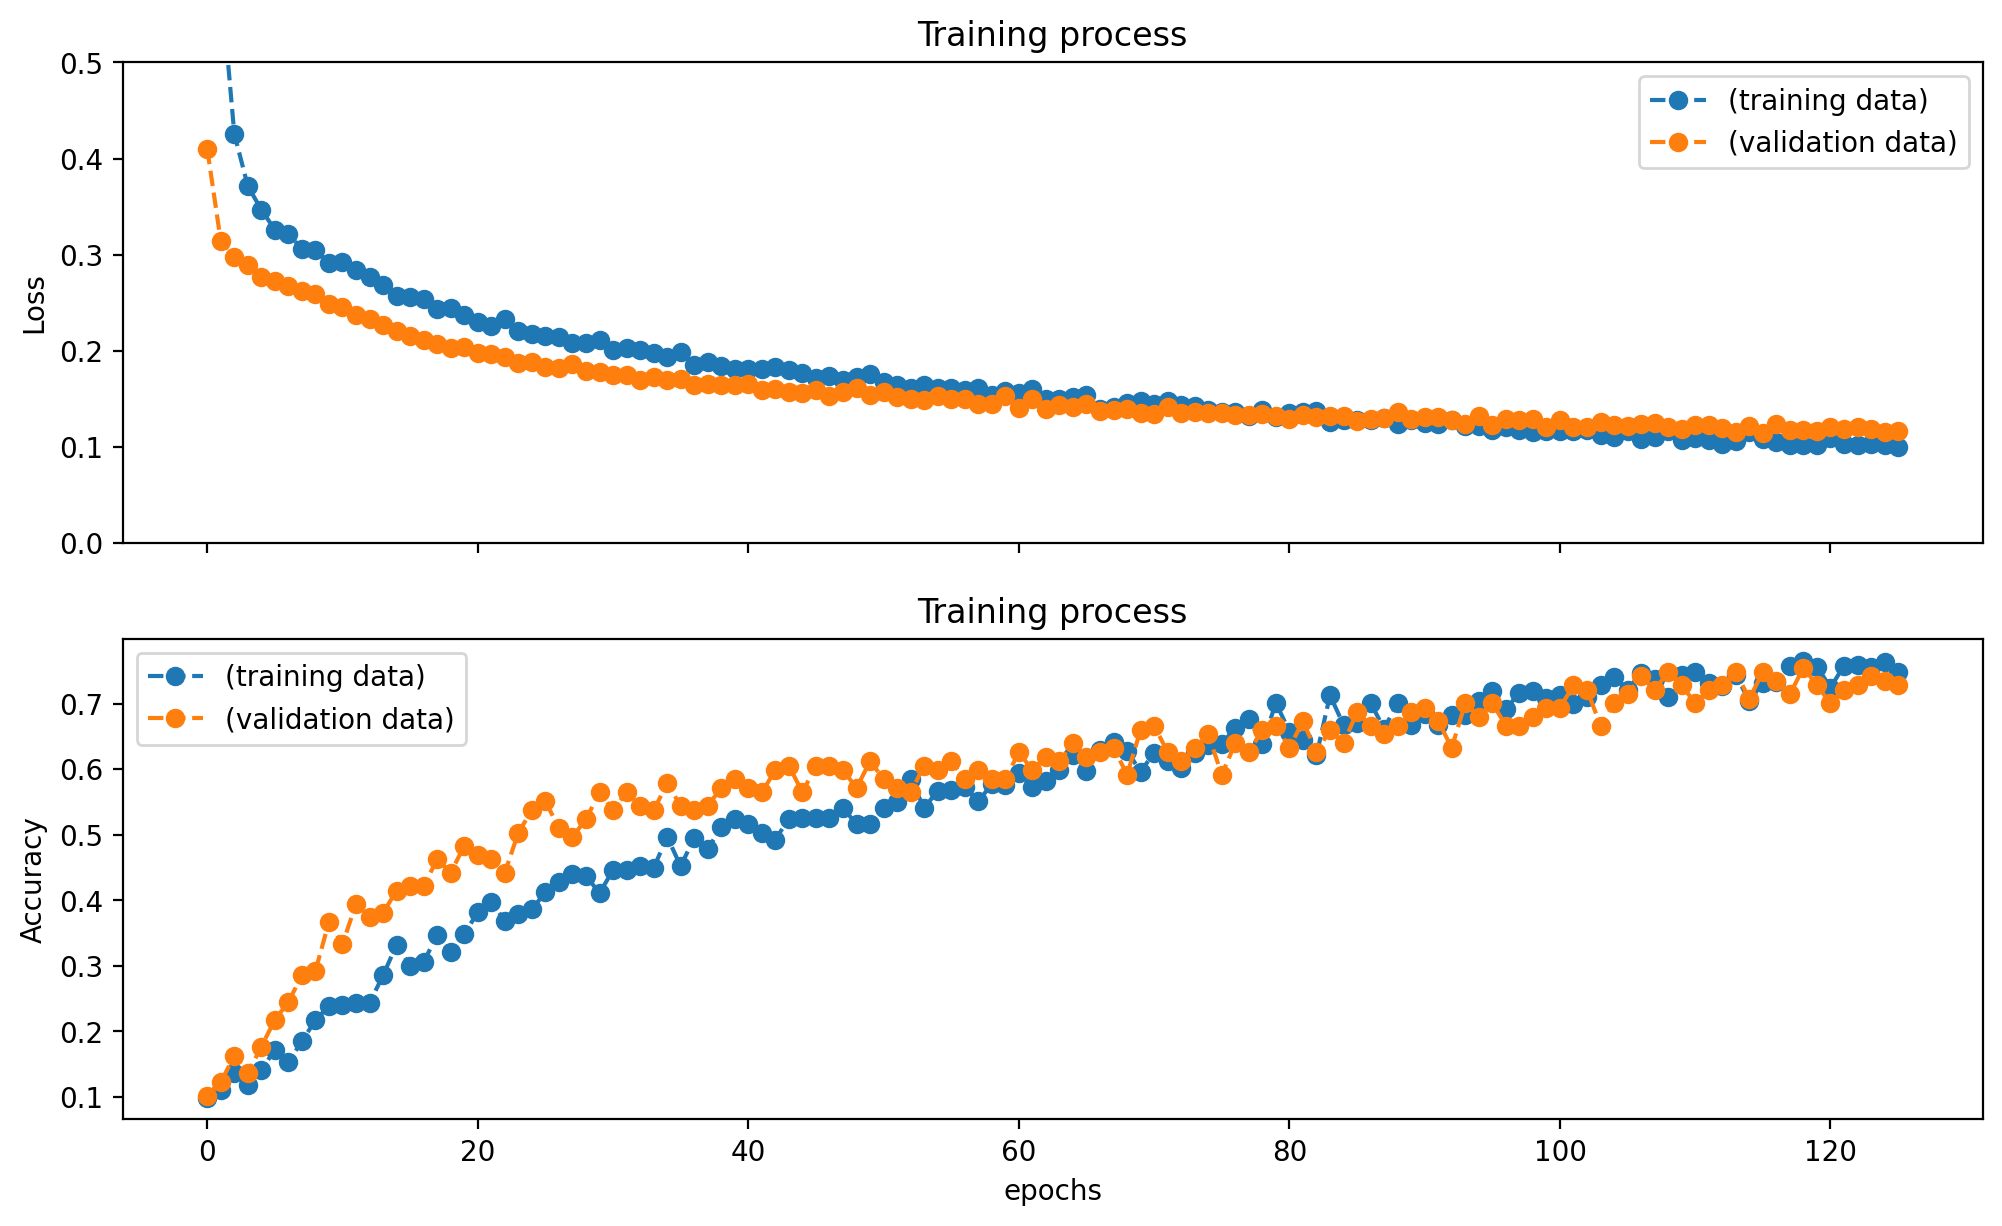

In [167]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['loss'], "o--", label='(training data)')
ax1.plot(history.history['val_loss'], "o--", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("Loss")
ax1.set_ylim((0, 0.5))
ax1.legend()

ax2.plot(history.history['accuracy'], "o--", label='(training data)')
ax2.plot(history.history['val_accuracy'], "o--", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("epochs")
ax2.legend()

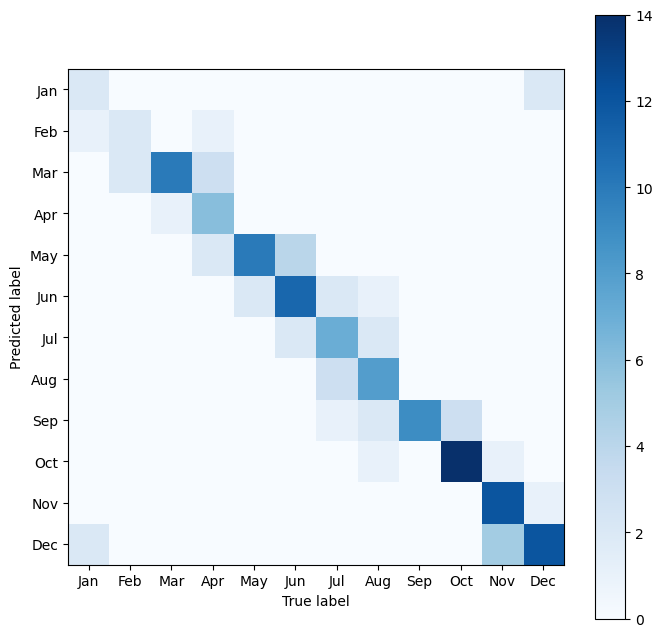

In [168]:
from sklearn.metrics import confusion_matrix
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

y_predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test.values.argmax(axis=1), y_predicted.argmax(axis=1))

plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(matrix, cmap="Blues")
plt.colorbar()
plt.xticks(np.arange(0,12), labels)
plt.yticks(np.arange(0,12), labels)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()